In [1]:
%load_ext cypher
%matplotlib inline
import pandas as pd

### Number of Tweets

In [2]:
%cypher match (n:tweet) return count(n)

1 rows affected.


count(n)
337174


### Number of users

In [3]:
%cypher match (u:user) return count(u)

1 rows affected.


count(u)
99482


### Top Tweets

In [4]:
%%cypher
match (n:tweet)-[r]-()
with n, count(r) as deg
order by deg desc
limit 10
match (n)<-[:TWEETS]-(u:user)
return u.screen_name as user, n.tid as tid, substring(n.text, 0, 20) as tweet, deg

10 rows affected.


user,tid,tweet,deg
DELAESPRIELLAE,682222059888365570,Los mejores deseos p,3339
piedadcordoba,676816668736274437,Presidente Chávez: a,1976
chavezcandanga,243071268004438016,Acompañemos a la her,1697
AlvaroUribeVel,677100763924078592,1.Es esto paz? Narco,1609
AndresPastrana_,704006738735984640,Lo tengo. La entiend,1522
dtavares,678921162513084416,'gente a miss colomb,1252
EPN,677020610057265152,Felicito al Presiden,986
AlvaroUribeVel,705387639155920897,Según ONU Colombia e,958
RosLehtinen,695398033484152832,¿Deben los contribuy,807
AlvaroUribeVel,677631504340643841,La paz empieza con e,776


### Top Users

In [5]:
%%cypher
match (n:user)-[r]-()
return n.screen_name as user, n.uid, count(r) as deg
order by deg desc
limit 10

10 rows affected.


user,n.uid,deg
JuanManSantos,64839766,27370
AlvaroUribeVel,61097151,15092
omarbula,192538987,10183
elespectador,14834302,6780
ELTIEMPO,9633802,6020
AndresPastrana_,1301761278,5192
zairsoli,2411508153,5164
DELAESPRIELLAE,548906668,5019
piedadcordoba,34798360,4909
elnuevoherald,34641036,4540


### Top Tags

In [6]:
%%cypher
match (n:hashtag)-[r]-()
return n.hashtag as hashtags, count(r) as deg
order by deg desc
limit 10

10 rows affected.


hashtags,deg
colombia,45821
paz,7753
farc,5718
cuba,5062
venezuela,2464
lahoradelapaz,2450
noticias,2265
siguemeytesigo,2258
yaracuy,1956
farcsantismo,1637


### Language data

In [7]:
langs = %cypher match (n:tweet) where n.lang is not null return distinct n.lang, count(*) as num_tweets order by num_tweets desc

27 rows affected.


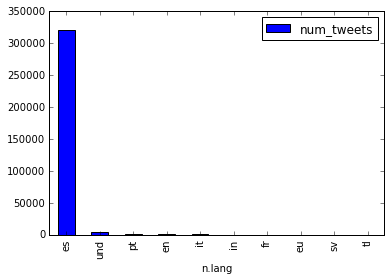

In [8]:
lang_df = langs.get_dataframe()
lang_df.set_index("n.lang")[:10].plot(kind="bar")

### % of tweets with geotags

In [9]:
%cypher match (n:tweet) return count(n)

1 rows affected.


count(n)
337174


In [10]:
%cypher match (n:tweet) where n.coordinates is not null return count(n)

1 rows affected.


count(n)
5213


In [11]:
5213 / 337174.0  # 1.5%

0.01546085997140942

### Tweets by country

In [12]:
countries = %cypher match (n:tweet) where n.coordinates is not null return distinct n.country, count(*) as num_tweets order by num_tweets desc

37 rows affected.


In [14]:
countries_df = countries.get_dataframe()

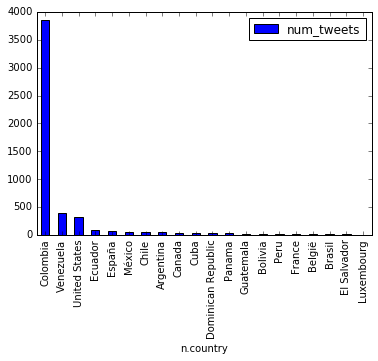

In [15]:
countries_df.set_index("n.country")[:20].plot(kind="bar")